### Visualisations

This notebook is used to create the final, pleasantly looking, visualisations of the derivatives with respect to the hyperparameters. 

In [368]:
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import pickle5 as pickle

sns.set_theme(style="white", font='cmr10.ttf')

In [369]:
prior = "lasso_alternative"
parameter = "a0_lasso"
start = 1e-3
finish = 2
interval = 256
M = 3

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}_vb_based_huber.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [370]:
parameter = sensitivity_results[1][0]
derivatives = sensitivity_results[1][1]

In [371]:
parameter_a0 = np.block(sensitivity_results[0])[:,0]
derivatives_a0 = np.block(sensitivity_results[0])[:,75]
sensitivity_results_g0 = sensitivity_results

## Lasso: $a_{0}$

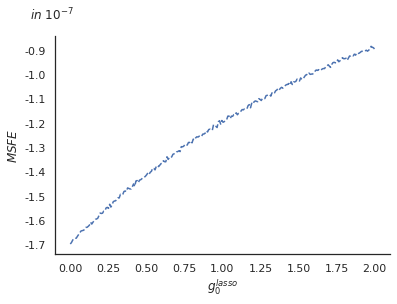

In [372]:
dataset = np.array([parameter_a0, derivatives_a0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}^{lasso}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-1.7","-1.6","-1.5","-1.4","-1.3","-1.2","-1.1", "-1.0", -0.9])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)

sns.despine()        

### h-step

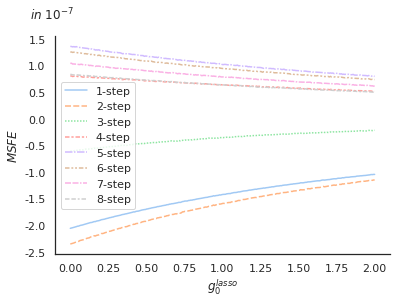

In [325]:
data = pd.DataFrame(np.block(sensitivity_results_g0[0])[:,-8:], index=np.block(sensitivity_results_g0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$g_{0}^{lasso}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-2.5","-2.0","-1.5","-1.0","-0.5","0.0","0.5","1.0", "1.5"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)

sns.despine()        

plt.savefig("../visualisations/lasso_g0_hstep.svg")

## Lasso: $b_{0}$

In [373]:
prior = "lasso_alternative"
parameter = "b0_lasso"
start = 1e-3
finish = 1
interval = 256

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}_vb_based_huber.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [374]:
parameter_b0 = np.block(sensitivity_results[0])[:,0]
derivatives_b0 = np.block(sensitivity_results[0])[:,75]
sensitivity_results_h0 = sensitivity_results

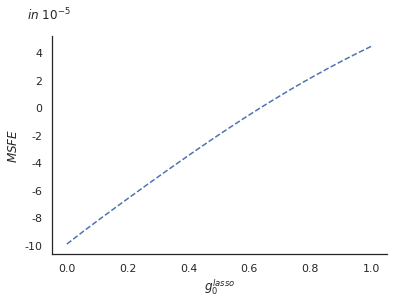

In [378]:
dataset = np.array([parameter_b0, derivatives_b0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}^{lasso}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-10","-8","-6","-4","-2","0","2","4"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-5}$", transform=fig.transAxes)

sns.despine()

### h-step

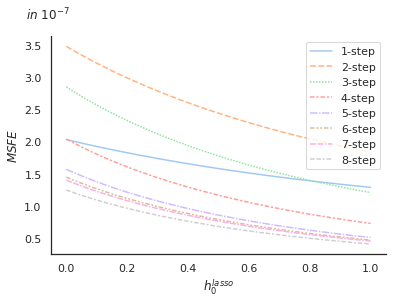

In [382]:
data = pd.DataFrame(np.block(sensitivity_results[0])[:,-8:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$h_{0}^{lasso}$")
fig.set_ylabel("$\it{MSFE}$")
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)
fig.set_yticklabels(["","0.5","1.0","1.5","2.0","2.5","3.0","3.5"])

sns.despine()        

plt.savefig("../visualisations/lasso_h0_hstep.svg")

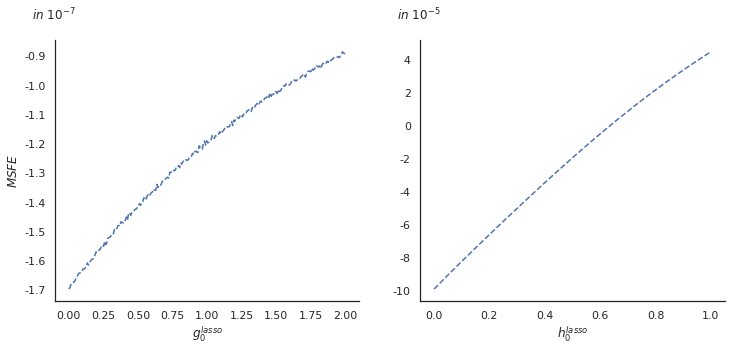

In [380]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

#f.suptitle("Derivatives for the Lasso prior in $M = 3$", y = 1.05)

## a_0

f.add_subplot(gs[0,0])


dataset = np.array([parameter_a0, derivatives_a0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}^{lasso}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-1.7","-1.6","-1.5","-1.4","-1.3","-1.2","-1.1", "-1.0", -0.9])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)

sns.despine()        

## b_0

f.add_subplot(gs[0,1])

dataset = np.array([parameter_b0, derivatives_b0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}^{lasso}$")
fig.set_ylabel("")
fig.set_yticklabels(["","-10","-8","-6","-4","-2","0","2","4"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-5}$", transform=fig.transAxes)

sns.despine()


plt.savefig("../visualisations/lasso_complete_huber.svg")

### h-step

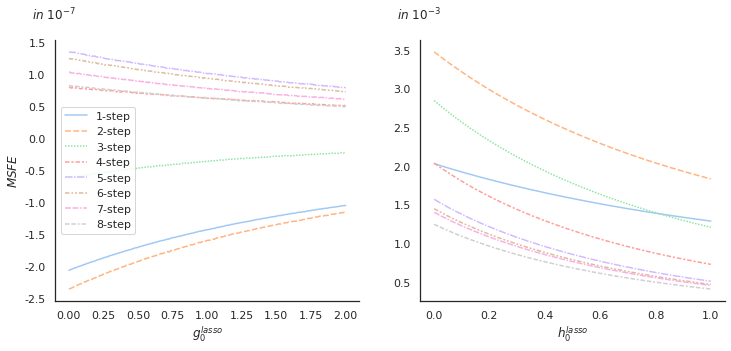

In [383]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

## g_0

f.add_subplot(gs[0,0])

data = pd.DataFrame(np.block(sensitivity_results_g0[0])[:,-8:], index=np.block(sensitivity_results_g0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$g_{0}^{lasso}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-2.5","-2.0","-1.5","-1.0","-0.5","0.0","0.5","1.0", "1.5"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)

sns.despine()        

plt.savefig("../visualisations/lasso_g0_hstep.svg")  

## h_0

f.add_subplot(gs[0,1])

data = pd.DataFrame(np.block(sensitivity_results_h0[0])[:,-8:], index=np.block(sensitivity_results_h0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}^{lasso}$")
fig.set_ylabel("")
fig.set_yticklabels(["","0.5","1.0","1.5","2.0","2.5","3.0","3.5"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()   

plt.savefig("../visualisations/lasso_hstep.svg")

## SVSS: $g_{0}$

In [384]:
prior = "svss"
parameter = "g0"
start = 1
finish = 1.5
interval = 64

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}_std_huber.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [385]:
parameter_g0 = np.block(sensitivity_results[0])[:,0]
derivatives_g0 = np.block(sensitivity_results[0])[:,1:].flatten()
sensitivity_results_g0 = sensitivity_results

In [386]:
derivatives_g0 = np.block(sensitivity_results[0])[:,75]

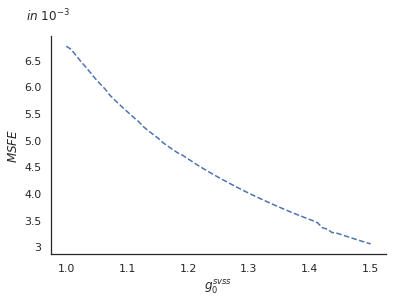

In [387]:
dataset = np.array([parameter_g0, derivatives_g0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter",data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}^{svss}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","3","3.5","4.0","4.5","5.0","5.5","6.0","6.5"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()

## SVSS: $h_{0}$

In [388]:
prior = "svss"
parameter = "h0"
start = 12
finish = 14
interval = 128

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}_huber.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [389]:
parameter_h0 = np.block(sensitivity_results[0])[:,0]
derivatives_h0 = np.block(sensitivity_results[0])[:,1:].flatten()
sensitivity_results_h0 = sensitivity_results

In [390]:
derivatives_h0 = np.block(sensitivity_results[0])[:,75]

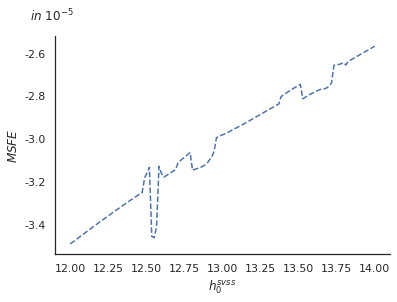

In [391]:
dataset = np.array([parameter_h0, derivatives_h0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}^{svss}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-3.4","-3.2","-3.0","-2.8","-2.6"])

fig.text(-0.075,1.075, "$\it{in}$ $10^{-5}$", transform=fig.transAxes)
sns.despine()

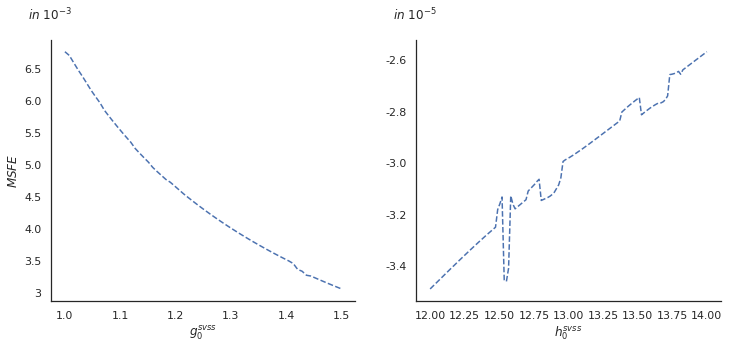

In [361]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

dataset = np.array([parameter_g0, derivatives_g0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

## g_0

f.add_subplot(gs[0,0])

dataset = np.array([parameter_g0, derivatives_g0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter",data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}^{svss}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","3","3.5","4.0","4.5","5.0","5.5","6.0","6.5"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()
## h_0

f.add_subplot(gs[0,1])

dataset = np.array([parameter_h0, derivatives_h0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}^{svss}$")
fig.set_ylabel("")
fig.set_yticklabels(["","-3.4","-3.2","-3.0","-2.8","-2.6"])

fig.text(-0.075,1.075, "$\it{in}$ $10^{-5}$", transform=fig.transAxes)
sns.despine()

sns.despine()

plt.savefig("../visualisations/svss_complete.svg")

### H-steps

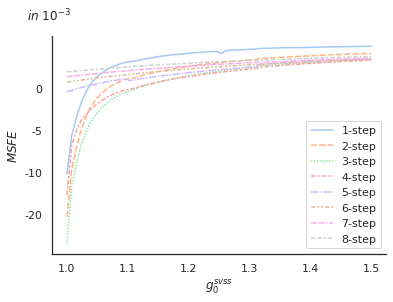

In [395]:
data = pd.DataFrame(np.block(sensitivity_results_g0[0])[:,-8:], index=np.block(sensitivity_results_g0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$g_{0}^{svss}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-20","-10","-5","0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()        

plt.savefig("../visualisations/svss_g0_hstep.svg")

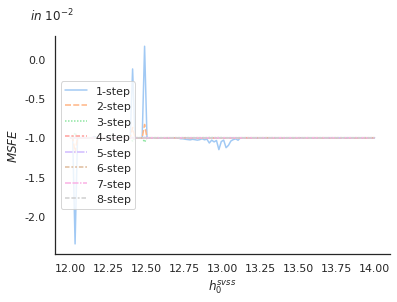

In [366]:
data = pd.DataFrame(np.block(sensitivity_results_h0[0])[:,-8:], index=np.block(sensitivity_results_h0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$h_{0}^{svss}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-2.0","-1.5","-1.0","-0.5","0.0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-2}$", transform=fig.transAxes)

sns.despine()        

plt.savefig("../visualisations/svss_h0_hstep.svg")

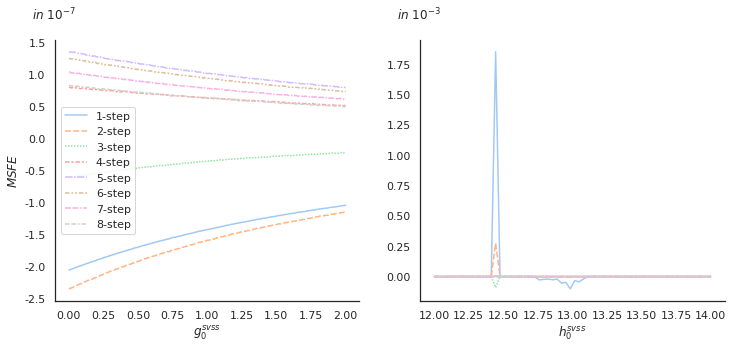

In [354]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

## g_0

f.add_subplot(gs[0,0])

data = pd.DataFrame(np.block(sensitivity_results_g0[0])[:,-8:], index=np.block(sensitivity_results_g0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$g_{0}^{svss}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-2.5","-2.0","-1.5","-1.0","-0.5","0.0","0.5","1.0","1.5"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)


## h_0

f.add_subplot(gs[0,1])

data = pd.DataFrame(np.block(sensitivity_results_h0[0])[:,-8:], index=np.block(sensitivity_results_h0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])
fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}^{svss}$")
fig.set_ylabel("")
#fig.set_yticklabels(["","-3","-2.5","-2.0","-1.5","-1.0","-0.5","0.0","0.5","1.0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)
sns.despine()

plt.savefig("../visualisations/svss_hstep.svg")

## Horseshoe: $a_{0}$

In [243]:
prior = "horseshoe"
parameter = "a0"
start = 4
finish = 5
interval = 256
M = 3

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}_vb_based_huber.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [244]:
parameter_g0 = np.block(sensitivity_results[0])[:,0]
derivatives_g0 = np.block(sensitivity_results[0])[:,1:].flatten()
sensitivity_results_g0 = sensitivity_results

In [245]:
derivatives_g0 = np.block(sensitivity_results[0])[:,75][:,]

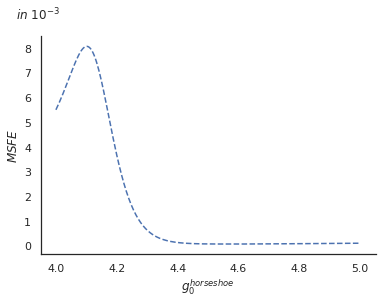

In [246]:
dataset = np.array([parameter_g0, derivatives_g0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

# data = pd.DataFrame(np.block(sensitivity_results[0])[:,1:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])
fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}^{horseshoe}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","0","1","2","3","4","5","6","7","8"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)
sns.despine()

# h-step - Horseshoe

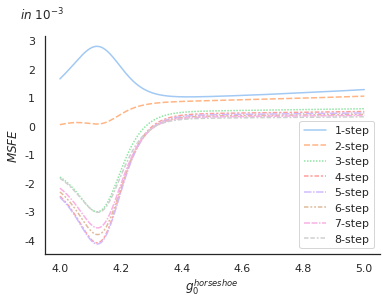

In [266]:
data = pd.DataFrame(np.block(sensitivity_results[0])[:,-8:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$g_{0}^{horseshoe}$")
fig.set_ylabel("$\it{MSFE}$")
#fig.set_yticklabels(["","","-8","-6","-4","-2"])
#fig.set_yticklabels(["","-10","-8","-6","-4","-2","0"])
fig.set_yticklabels(["","-4","-3","-2","-1","0","1","2","3"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()        

plt.savefig("../visualisations/horseshoe_g0_hstep.svg")

In [247]:
prior = "horseshoe"
parameter = "b0"
start = 1
finish = 1.25
interval = 256
M = 3

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}_vb_based_huber.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [248]:
parameter_h0 = np.block(sensitivity_results[0])[:,0]
derivatives_h0 = np.block(sensitivity_results[0])[:,75]
sensitivity_results_h0 = sensitivity_results

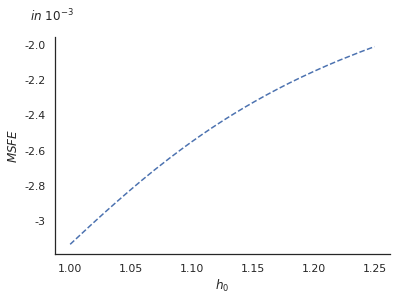

In [249]:
dataset = np.array([parameter_h0, derivatives_h0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-3","-2.8","-2.6","-2.4","-2.2","-2.0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)
sns.despine()

# h-step

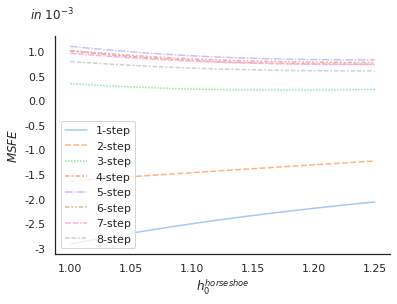

In [235]:
data = pd.DataFrame(np.block(sensitivity_results[0])[:,-8:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$h_{0}^{horseshoe}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-3","-2.5","-2.0","-1.5","-1.0","-0.5","0.0","0.5","1.0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()        

#plt.savefig("../visualisations/lasso_a0_hstep.svg")

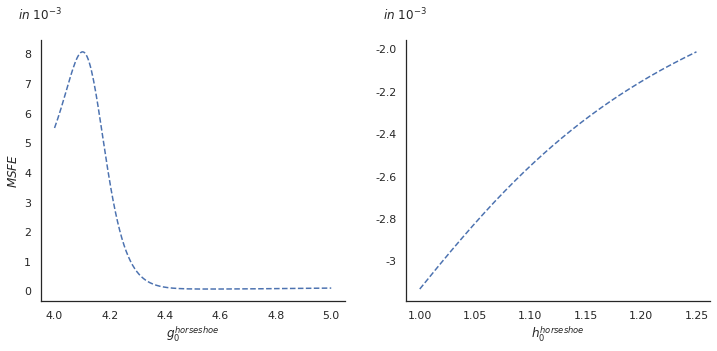

In [253]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

## g_0

f.add_subplot(gs[0,0])

dataset = np.array([parameter_g0, derivatives_g0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}^{horseshoe}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","0","1","2","3","4","5","6","7","8"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)
sns.despine()

## h_0

f.add_subplot(gs[0,1])
dataset = np.array([parameter_h0, derivatives_h0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}^{horseshoe}$")
fig.set_ylabel("")
fig.set_yticklabels(["","-3","-2.8","-2.6","-2.4","-2.2","-2.0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)
sns.despine()

sns.despine()

plt.savefig("../visualisations/horseshoe_complete.svg")

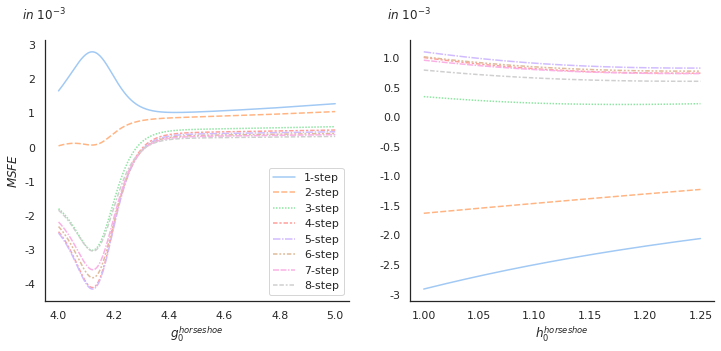

In [254]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

## g_0

f.add_subplot(gs[0,0])

data = pd.DataFrame(np.block(sensitivity_results_g0[0])[:,-8:], index=np.block(sensitivity_results_g0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$g_{0}^{horseshoe}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-4","-3","-2","-1","0","1","2","3"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()        

## h_0

f.add_subplot(gs[0,1])

data = pd.DataFrame(np.block(sensitivity_results_h0[0])[:,-8:], index=np.block(sensitivity_results_h0[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])
fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}^{horseshoe}$")
fig.set_ylabel("")
fig.set_yticklabels(["","-3","-2.5","-2.0","-1.5","-1.0","-0.5","0.0","0.5","1.0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)
sns.despine()

plt.savefig("../visualisations/horseshoe_hstep.svg")